# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../src/')

# XXX
## Import Packages

In [2]:
import pandas as pd

import geopandas as gpd

from italy_geopop.pandas_extension import pandas_activate
pandas_activate(include_geometry=True, data_year=2022)


from maps.maps import simple_plot, explore_plot
from maps.utils import get_codes_from_provinces, south_italy

## Start here
### Get Data

In [3]:
region_data = pd.Series(south_italy).italy_geopop.from_region()

codes = get_codes_from_provinces(region_data["provinces"])

data = pd.Series(codes)
geodata = data.italy_geopop.from_municipality(population_limits='total')
geodata = geodata[["municipality_code", "municipality", "geometry", "population"]]
geodata["eligible_for_pension_benefit"] = geodata["population"] < 20000

gdf = gpd.GeoDataFrame(geodata)


/home/vscode/.local/lib/python3.11/site-packages/italy_geopop/geopop.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_df.groupby(["municipality_code", "age_group"])[


## Plot

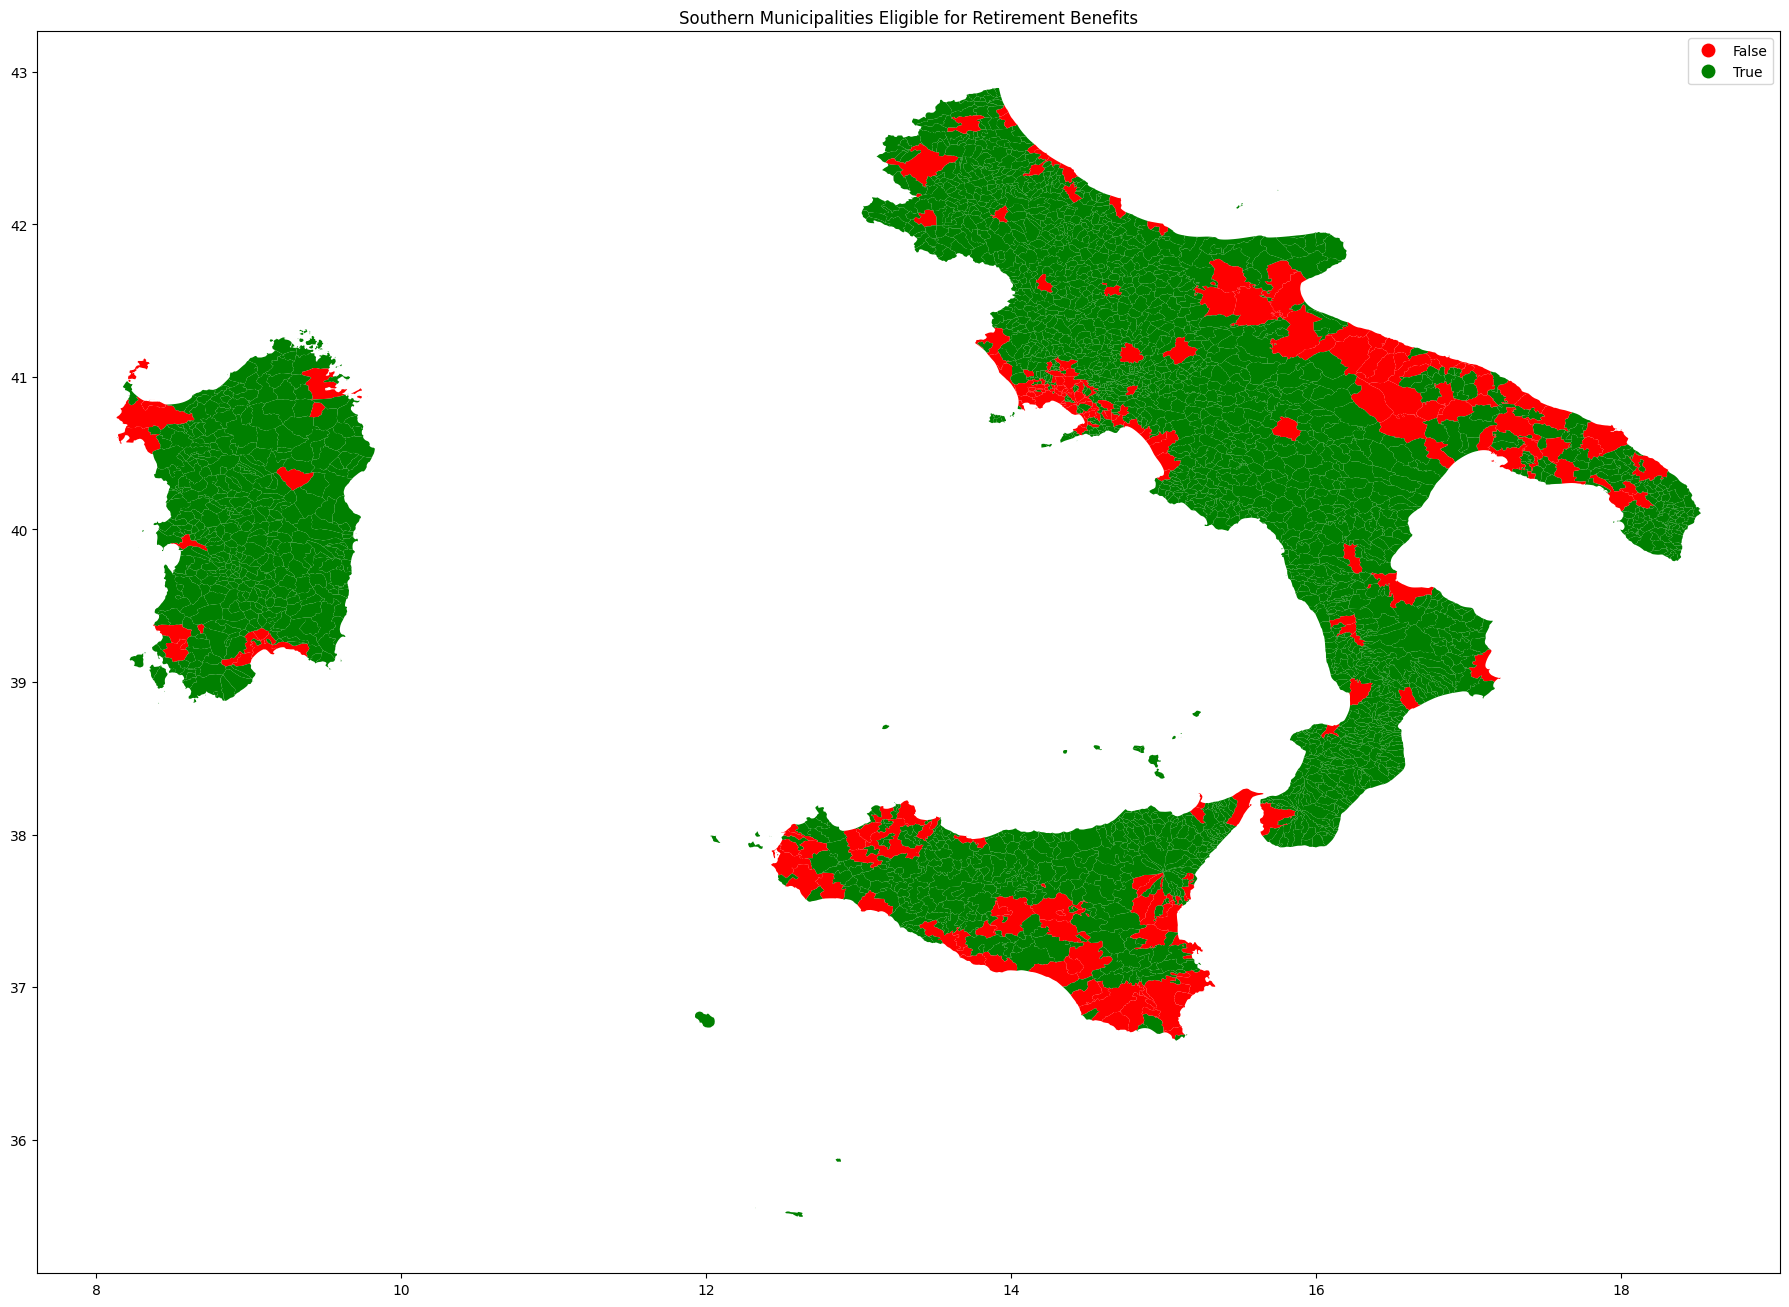

<Figure size 640x480 with 0 Axes>

In [4]:
simple_plot(gdf)

## Explore

In [5]:
explore_plot(gdf)